In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


## Part 1 - Data Preprocessing

- __Step 1__: Importing the training set

- __Step 2__: Feature Scaling

- __Step 3__: Creating a data structure with 60 timesteps and 1 output

- __Step 4__: Reshaping data

In [2]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
train_set = df_train.iloc[:, 1:2].values

In [3]:
sc = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = sc.fit_transform(train_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building the RNN

- __Step 1__: Initialising the RNN
- __Step 2__: Adding the first LSTM layer and some Dropout regularisation
- __Step 3__: Adding a second LSTM layer and some Dropout regularisation
- __Step 4__: Adding a third LSTM layer and some Dropout regularisation
- __Step 5__: Adding a fourth LSTM layer and some Dropout regularisation
- __Step 6__: Adding the output layer
- __Step 7__: Compiling the RNN
- __Step 8__: Fitting the RNN to the Training set

In [6]:
def regressor_creation():
    regressor = Sequential()
    regressor.add(LSTM(units=50, return_sequences=True,
                       input_shape=(X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error')
    return regressor

In [7]:
regressor = regressor_creation()

In [9]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0150
Epoch 2/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0047
Epoch 5/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0047
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 17s 14ms/step - loss: 0.0016
Epoch 96/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0013


## Part 3 - Making the predictions and visualising the results

- __Step 1__: Getting the real stock price of 2017
- __Step 2__: Getting the predicted stock price of 2017
- __Step 3__: Visualising the results

In [10]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
df_total = pd.concat(
    (df_train['Open'], dataset_test['Open']), axis=0)
inputs = df_total[len(df_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [15]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [16]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

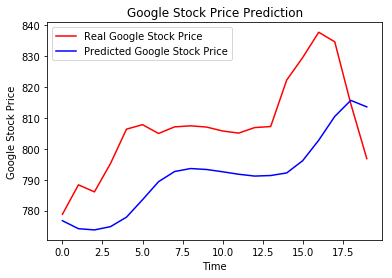

In [17]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',
         label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()